In [2]:
import pandas as pd

In [2]:
# df_application_train = pd.read_csv('./data/application_train.csv')
# df_application_train.head()

# df_bureau = pd.read_csv('./data/bureau.csv')
# df_bureau.head()

# df_bureau_balance = pd.read_csv('./data/bureau_balance.csv')
# df_bureau_balance.head()

# df_credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')
# df_credit_card_balance.head()

# df_installments_payments = pd.read_csv('./data/installments_payments.csv')
# df_installments_payments.head()

# df_pos_cash_balance = pd.read_csv('./data/POS_CASH_balance.csv')
# df_pos_cash_balance.head()

df_previous_application = pd.read_csv('./data/previous_application.csv')
df_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [3]:
# previous_application.csv aggregation

# take a subset of the rows so that runtime is faster
df_previous_application = df_previous_application.sample(n=10000, random_state=42)

important_columns = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 
                     'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CNT_PAYMENT']
df_previous_application = df_previous_application[important_columns]

# Compute the difference between AMT_APPLICATION and AMT_CREDIT once
df_previous_application['amt_diff'] = df_previous_application['AMT_APPLICATION'] - df_previous_application['AMT_CREDIT']

# Perform the aggregation
aggregated = df_previous_application.groupby('SK_ID_CURR').agg(
    # Number of previous applications
    n_previous_applications=('SK_ID_CURR', 'count'),
    
    # Count how many applications were approved, refused, or canceled
    n_approved=('NAME_CONTRACT_STATUS', lambda x: (x == 'Approved').sum()),
    n_refused=('NAME_CONTRACT_STATUS', lambda x: (x == 'Refused').sum()),
    n_canceled=('NAME_CONTRACT_STATUS', lambda x: (x == 'Canceled').sum()),
    
    # Approval rate (using `mean` directly on a boolean comparison)
    approval_rate=('NAME_CONTRACT_STATUS', lambda x: (x == 'Approved').mean()),
    
    # Mean and standard deviation of the precomputed difference
    amt_diff_mean=('amt_diff', 'mean'),
    amt_diff_std=('amt_diff', 'std'),
    
    # Aggregation of DAYS_DECISION
    avg_days_decision=('DAYS_DECISION', 'mean'),
    min_days_decision=('DAYS_DECISION', 'min'),
    max_days_decision=('DAYS_DECISION', 'max'),
    
    # Aggregation of CNT_PAYMENT
    avg_cnt_payment=('CNT_PAYMENT', 'mean'),
    max_cnt_payment=('CNT_PAYMENT', 'max')
)

aggregated = df_previous_application.groupby('SK_ID_CURR').agg(
    # Number of previous applications
    n_previous_applications=('SK_ID_CURR', 'count'),
    
    # Count how many applications were approved, refused, or canceled
    n_approved=('NAME_CONTRACT_STATUS', lambda x: (x == 'Approved').sum()),
    n_refused=('NAME_CONTRACT_STATUS', lambda x: (x == 'Refused').sum()),
    n_canceled=('NAME_CONTRACT_STATUS', lambda x: (x == 'Canceled').sum()),
    
    # Approval rate
    approval_rate=('NAME_CONTRACT_STATUS', lambda x: (x == 'Approved').mean()),
    
    # Difference between application amount and credit received
    amt_diff_mean=('AMT_APPLICATION', lambda x: (df_previous_application['AMT_APPLICATION'] - df_previous_application['AMT_CREDIT']).mean()),
    amt_diff_std=('AMT_APPLICATION', lambda x: (df_previous_application['AMT_APPLICATION'] - df_previous_application['AMT_CREDIT']).std()),
    
    # Aggregation of DAYS_DECISION
    avg_days_decision=('DAYS_DECISION', 'mean'),
    min_days_decision=('DAYS_DECISION', 'min'),
    max_days_decision=('DAYS_DECISION', 'max'),
    
    # Aggregation of CNT_PAYMENT
    avg_cnt_payment=('CNT_PAYMENT', 'mean'),
    max_cnt_payment=('CNT_PAYMENT', 'max')
)

aggregated.reset_index(inplace=True)

aggregated.head()

SK_ID_CURR  n_previous_applications  n_approved  n_refused  n_canceled  \
0      100111                        1           1          0           0   
1      100170                        2           1          0           1   
2      100221                        1           1          0           0   
3      100263                        1           1          0           0   
4      100302                        1           1          0           0   

   approval_rate  amt_diff_mean  amt_diff_std  avg_days_decision  \
0            1.0  -20398.632836  71373.504877             -976.0   
1            0.5  -20398.632836  71373.504877             -942.5   
2            1.0  -20398.632836  71373.504877            -1903.0   
3            1.0  -20398.632836  71373.504877               -7.0   
4            1.0  -20398.632836  71373.504877             -832.0   

   min_days_decision  max_days_decision  avg_cnt_payment  max_cnt_payment  
0               -976               -976             10.0             10.0  
1              -1656               -229             24.0             24.0  
2              -1903              -1903             10.0             10.0  
3                 -7                 -7             10.0             10.0  
4               -832               -832             24.0             24.0

In [4]:
aggregated.columns

Index(['SK_ID_CURR', 'n_previous_applications', 'n_approved', 'n_refused',
       'n_canceled', 'approval_rate', 'amt_diff_mean', 'amt_diff_std',
       'avg_days_decision', 'min_days_decision', 'max_days_decision',
       'avg_cnt_payment', 'max_cnt_payment'],
      dtype='object')

Text(0.5, 1.0, 'Number of Previous Applications and Approval Rate')

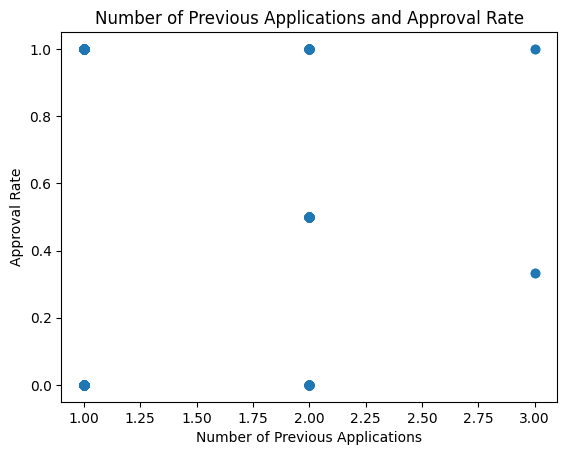

In [5]:
import matplotlib.pyplot as plt

# 1. Scatter plot of the number of previous applications and approval rate
plt.scatter(aggregated['n_previous_applications'], aggregated['approval_rate'])
plt.xlabel('Number of Previous Applications')
plt.ylabel('Approval Rate')
plt.title('Number of Previous Applications and Approval Rate')

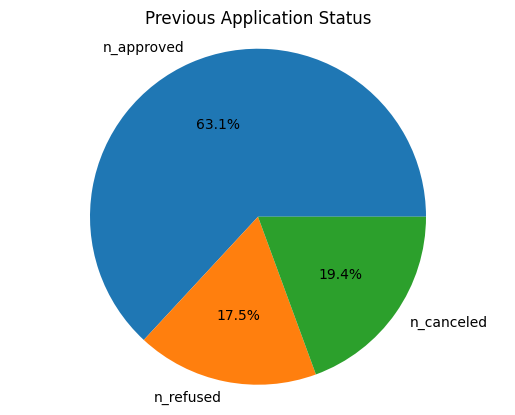

In [6]:
# Application status analysis (pie chart)

status_counts = aggregated[['n_approved', 'n_refused', 'n_canceled']].sum()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Previous Application Status')

plt.show()

In [3]:
# read in final merged data
df_final = pd.read_csv('./final.csv')
df_final.head()

Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0      100002       1         Cash loans           M            N   
1           1      100003       0         Cash loans           F            N   
2           2      100004       0    Revolving loans           M            Y   
3           3      100006       0         Cash loans           F            N   
4           4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  ...  n_refused  \
0               Y             0          202500.0    406597.5  ...        0.0   
1               N             0          270000.0   1293502.5  ...        0.0   
2               Y             0           67500.0    135000.0  ...        0.0   
3               Y             0          135000.0    312682.5  ...        1.0   
4               Y             0          121500.0    513000.0  ...        0.0   

   n_canceled approval_rate amt_diff_mean  amt_diff_std avg_days_decision  \
0         0.0      1.000000          0.00           NaN       -606.000000   
1         0.0      1.000000     -48754.50  75688.604015      -1305.000000   
2         0.0      1.000000       4176.00           NaN       -815.000000   
3         3.0      0.555556     -19492.24  78563.585484       -272.444444   
4         0.0      1.000000     -16108.50  23976.561255      -1222.833333   

  min_days_decision  max_days_decision  avg_cnt_payment  max_cnt_payment  
0            -606.0             -606.0        24.000000             24.0  
1           -2341.0             -746.0        10.000000             12.0  
2            -815.0             -815.0         4.000000              4.0  
3            -617.0             -181.0        23.000000             48.0  
4           -2357.0             -374.0        20.666667             48.0  

[5 rows x 136 columns]

In [4]:
df_final

Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
0                0      100002       1         Cash loans           M   
1                1      100003       0         Cash loans           F   
2                2      100004       0    Revolving loans           M   
3                3      100006       0         Cash loans           F   
4                4      100007       0         Cash loans           M   
...            ...         ...     ...                ...         ...   
307506      307506      456251       0         Cash loans           M   
307507      307507      456252       0         Cash loans           F   
307508      307508      456253       0         Cash loans           F   
307509      307509      456254       1         Cash loans           F   
307510      307510      456255       0         Cash loans           F   

       FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0                 N               Y             0          202500.0   
1                 N               N             0          270000.0   
2                 Y               Y             0           67500.0   
3                 N               Y             0          135000.0   
4                 N               Y             0          121500.0   
...             ...             ...           ...               ...   
307506            N               N             0          157500.0   
307507            N               Y             0           72000.0   
307508            N               Y             0          153000.0   
307509            N               Y             0          171000.0   
307510            N               N             0          157500.0   

        AMT_CREDIT  ...  n_refused  n_canceled approval_rate amt_diff_mean  \
0         406597.5  ...        0.0         0.0      1.000000         0.000   
1        1293502.5  ...        0.0         0.0      1.000000    -48754.500   
2         135000.0  ...        0.0         0.0      1.000000      4176.000   
3         312682.5  ...        1.0         3.0      0.555556    -19492.240   
4         513000.0  ...        0.0         0.0      1.000000    -16108.500   
...            ...  ...        ...         ...           ...           ...   
307506    254700.0  ...        0.0         0.0      1.000000         0.000   
307507    269550.0  ...        0.0         0.0      1.000000       774.000   
307508    677664.0  ...        0.0         0.0      1.000000      3537.000   
307509    370107.0  ...        0.0         0.0      1.000000    -13122.000   
307510    675000.0  ...        2.0         0.0      0.750000    -61660.125   

         amt_diff_std avg_days_decision min_days_decision  max_days_decision  \
0                 NaN       -606.000000            -606.0             -606.0   
1        75688.604015      -1305.000000           -2341.0             -746.0   
2                 NaN       -815.000000            -815.0             -815.0   
3        78563.585484       -272.444444            -617.0             -181.0   
4        23976.561255      -1222.833333           -2357.0             -374.0   
...               ...               ...               ...                ...   
307506            NaN       -273.000000            -273.0             -273.0   
307507            NaN      -2497.000000           -2497.0            -2497.0   
307508    2730.139282      -2380.000000           -2851.0            -1909.0   
307509   14866.212968       -299.500000            -322.0             -277.0   
307510  103044.627757       -587.625000            -991.0             -171.0   

        avg_cnt_payment  max_cnt_payment  
0             24.000000             24.0  
1             10.000000             12.0  
2              4.000000              4.0  
3             23.000000             48.0  
4             20.666667             48.0  
...                 ...              ...  
307506         8.000000              8.0  
307507         6.000000             

In [5]:
df_final.columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       ...
       'n_refused', 'n_canceled', 'approval_rate', 'amt_diff_mean',
       'amt_diff_std', 'avg_days_decision', 'min_days_decision',
       'max_days_decision', 'avg_cnt_payment', 'max_cnt_payment'],
      dtype='object', length=136)

In [6]:
# see all categorical columns
categorical_columns = df_final.select_dtypes(include='object').columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [7]:
# convert all categorical columns to one-hot encoding
df_final = pd.get_dummies(df_final, columns=categorical_columns)
df_final.head()

Unnamed: 0  SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           0      100002       1             0          202500.0    406597.5   
1           1      100003       0             0          270000.0   1293502.5   
2           2      100004       0             0           67500.0    135000.0   
3           3      100006       0             0          135000.0    312682.5   
4           4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  \
0      24700.5         351000.0                    0.018801       -9461  ...   
1      35698.5        1129500.0                    0.003541      -16765  ...   
2       6750.0         135000.0                    0.010032      -19046  ...   
3      29686.5         297000.0                    0.008019      -19005  ...   
4      21865.5         513000.0                    0.028663      -19932  ...   

   HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Block  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                                1                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  
0                       1                        0  
1                       1                        0  
2                       0                        0  
3                       0                        0  
4                       0                        0  

[5 rows x 259 columns]

In [8]:
# get value counts of null values
null_counts = df_final.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f'{column}: {count}')

AMT_ANNUITY: 12
AMT_GOODS_PRICE: 278
OWN_CAR_AGE: 202929
CNT_FAM_MEMBERS: 2
EXT_SOURCE_1: 173378
EXT_SOURCE_2: 660
EXT_SOURCE_3: 60965
APARTMENTS_AVG: 156061
BASEMENTAREA_AVG: 179943
YEARS_BEGINEXPLUATATION_AVG: 150007
YEARS_BUILD_AVG: 204488
COMMONAREA_AVG: 214865
ELEVATORS_AVG: 163891
ENTRANCES_AVG: 154828
FLOORSMAX_AVG: 153020
FLOORSMIN_AVG: 208642
LANDAREA_AVG: 182590
LIVINGAPARTMENTS_AVG: 210199
LIVINGAREA_AVG: 154350
NONLIVINGAPARTMENTS_AVG: 213514
NONLIVINGAREA_AVG: 169682
APARTMENTS_MODE: 156061
BASEMENTAREA_MODE: 179943
YEARS_BEGINEXPLUATATION_MODE: 150007
YEARS_BUILD_MODE: 204488
COMMONAREA_MODE: 214865
ELEVATORS_MODE: 163891
ENTRANCES_MODE: 154828
FLOORSMAX_MODE: 153020
FLOORSMIN_MODE: 208642
LANDAREA_MODE: 182590
LIVINGAPARTMENTS_MODE: 210199
LIVINGAREA_MODE: 154350
NONLIVINGAPARTMENTS_MODE: 213514
NONLIVINGAREA_MODE: 169682
APARTMENTS_MEDI: 156061
BASEMENTAREA_MEDI: 179943
YEARS_BEGINEXPLUATATION_MEDI: 150007
YEARS_BUILD_MEDI: 204488
COMMONAREA_MEDI: 214865
ELEVATORS_MEDI:

In [9]:
# for these columns with missing values:
# n_previous_applications: 16454
# n_approved: 16454
# n_refused: 16454
# n_canceled: 16454
# approval_rate: 16454
# amt_diff_mean: 16454
# amt_diff_std: 68987
# avg_days_decision: 16454
# min_days_decision: 16454
# max_days_decision: 16454
# avg_cnt_payment: 16869
# max_cnt_payment: 16869
# fill with 0 for only these columns
cols_to_fill = ['n_previous_applications', 'n_approved', 'n_refused', 'n_canceled', 'approval_rate', 'amt_diff_mean', 'avg_days_decision', 'min_days_decision', 'max_days_decision', 'avg_cnt_payment', 'max_cnt_payment']
df_final[cols_to_fill] = df_final[cols_to_fill].fillna(0)

# for amt_diff_std, fill with the mean
# df_final['amt_diff_std'] = df_final['amt_diff_std'].fillna(df_final['amt_diff_std'].mean())

# get value counts of null values
null_counts = df_final.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f'{column}: {count}')

AMT_ANNUITY: 12
AMT_GOODS_PRICE: 278
OWN_CAR_AGE: 202929
CNT_FAM_MEMBERS: 2
EXT_SOURCE_1: 173378
EXT_SOURCE_2: 660
EXT_SOURCE_3: 60965
APARTMENTS_AVG: 156061
BASEMENTAREA_AVG: 179943
YEARS_BEGINEXPLUATATION_AVG: 150007
YEARS_BUILD_AVG: 204488
COMMONAREA_AVG: 214865
ELEVATORS_AVG: 163891
ENTRANCES_AVG: 154828
FLOORSMAX_AVG: 153020
FLOORSMIN_AVG: 208642
LANDAREA_AVG: 182590
LIVINGAPARTMENTS_AVG: 210199
LIVINGAREA_AVG: 154350
NONLIVINGAPARTMENTS_AVG: 213514
NONLIVINGAREA_AVG: 169682
APARTMENTS_MODE: 156061
BASEMENTAREA_MODE: 179943
YEARS_BEGINEXPLUATATION_MODE: 150007
YEARS_BUILD_MODE: 204488
COMMONAREA_MODE: 214865
ELEVATORS_MODE: 163891
ENTRANCES_MODE: 154828
FLOORSMAX_MODE: 153020
FLOORSMIN_MODE: 208642
LANDAREA_MODE: 182590
LIVINGAPARTMENTS_MODE: 210199
LIVINGAREA_MODE: 154350
NONLIVINGAPARTMENTS_MODE: 213514
NONLIVINGAREA_MODE: 169682
APARTMENTS_MEDI: 156061
BASEMENTAREA_MEDI: 179943
YEARS_BEGINEXPLUATATION_MEDI: 150007
YEARS_BUILD_MEDI: 204488
COMMONAREA_MEDI: 214865
ELEVATORS_MEDI:

In [10]:
# for the rest of the columns:
# AMT_ANNUITY: 12
# AMT_GOODS_PRICE: 278
# OWN_CAR_AGE: 202929
# CNT_FAM_MEMBERS: 2
# EXT_SOURCE_1: 173378
# EXT_SOURCE_2: 660
# EXT_SOURCE_3: 60965
# APARTMENTS_AVG: 156061
# BASEMENTAREA_AVG: 179943
# YEARS_BEGINEXPLUATATION_AVG: 150007
# YEARS_BUILD_AVG: 204488
# COMMONAREA_AVG: 214865
# ELEVATORS_AVG: 163891
# ENTRANCES_AVG: 154828
# FLOORSMAX_AVG: 153020
# FLOORSMIN_AVG: 208642
# LANDAREA_AVG: 182590
# LIVINGAPARTMENTS_AVG: 210199
# LIVINGAREA_AVG: 154350
# NONLIVINGAPARTMENTS_AVG: 213514
# NONLIVINGAREA_AVG: 169682
# APARTMENTS_MODE: 156061
# BASEMENTAREA_MODE: 179943
# YEARS_BEGINEXPLUATATION_MODE: 150007
# YEARS_BUILD_MODE: 204488
# COMMONAREA_MODE: 214865
# ELEVATORS_MODE: 163891
# ENTRANCES_MODE: 154828
# FLOORSMAX_MODE: 153020
# FLOORSMIN_MODE: 208642
# LANDAREA_MODE: 182590
# LIVINGAPARTMENTS_MODE: 210199
# LIVINGAREA_MODE: 154350
# NONLIVINGAPARTMENTS_MODE: 213514
# NONLIVINGAREA_MODE: 169682
# APARTMENTS_MEDI: 156061
# BASEMENTAREA_MEDI: 179943
# YEARS_BEGINEXPLUATATION_MEDI: 150007
# YEARS_BUILD_MEDI: 204488
# COMMONAREA_MEDI: 214865
# ELEVATORS_MEDI: 163891
# ENTRANCES_MEDI: 154828
# FLOORSMAX_MEDI: 153020
# FLOORSMIN_MEDI: 208642
# LANDAREA_MEDI: 182590
# LIVINGAPARTMENTS_MEDI: 210199
# LIVINGAREA_MEDI: 154350
# NONLIVINGAPARTMENTS_MEDI: 213514
# NONLIVINGAREA_MEDI: 169682
# TOTALAREA_MODE: 148431
# OBS_30_CNT_SOCIAL_CIRCLE: 1021
# DEF_30_CNT_SOCIAL_CIRCLE: 1021
# OBS_60_CNT_SOCIAL_CIRCLE: 1021
# DEF_60_CNT_SOCIAL_CIRCLE: 1021
# DAYS_LAST_PHONE_CHANGE: 1
# AMT_REQ_CREDIT_BUREAU_HOUR: 41519
# AMT_REQ_CREDIT_BUREAU_DAY: 41519
# AMT_REQ_CREDIT_BUREAU_WEEK: 41519
# AMT_REQ_CREDIT_BUREAU_MON: 41519
# AMT_REQ_CREDIT_BUREAU_QRT: 41519
# AMT_REQ_CREDIT_BUREAU_YEAR: 41519
# if the amount missing is small then remove the rows
# if the missing amount is large then remove the column
# there are 307511 rows in total

# remove rows with missing values for the following columns
cols_to_remove = ['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']
df_final = df_final.dropna(subset=cols_to_remove)

# for the rest of the columns, remove the columns
# df_final = df_final.dropna(axis=1)

# get value counts of null values
null_counts = df_final.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f'{column}: {count}')

AMT_GOODS_PRICE: 276
OWN_CAR_AGE: 202918
EXT_SOURCE_1: 173372
EXT_SOURCE_2: 659
EXT_SOURCE_3: 60962
APARTMENTS_AVG: 156054
BASEMENTAREA_AVG: 179933
YEARS_BEGINEXPLUATATION_AVG: 150000
YEARS_BUILD_AVG: 204477
COMMONAREA_AVG: 214854
ELEVATORS_AVG: 163884
ENTRANCES_AVG: 154821
FLOORSMAX_AVG: 153013
FLOORSMIN_AVG: 208631
LANDAREA_AVG: 182579
LIVINGAPARTMENTS_AVG: 210188
LIVINGAREA_AVG: 154343
NONLIVINGAPARTMENTS_AVG: 213503
NONLIVINGAREA_AVG: 169674
APARTMENTS_MODE: 156054
BASEMENTAREA_MODE: 179933
YEARS_BEGINEXPLUATATION_MODE: 150000
YEARS_BUILD_MODE: 204477
COMMONAREA_MODE: 214854
ELEVATORS_MODE: 163884
ENTRANCES_MODE: 154821
FLOORSMAX_MODE: 153013
FLOORSMIN_MODE: 208631
LANDAREA_MODE: 182579
LIVINGAPARTMENTS_MODE: 210188
LIVINGAREA_MODE: 154343
NONLIVINGAPARTMENTS_MODE: 213503
NONLIVINGAREA_MODE: 169674
APARTMENTS_MEDI: 156054
BASEMENTAREA_MEDI: 179933
YEARS_BEGINEXPLUATATION_MEDI: 150000
YEARS_BUILD_MEDI: 204477
COMMONAREA_MEDI: 214854
ELEVATORS_MEDI: 163884
ENTRANCES_MEDI: 154821
FLOO

In [11]:
# drop cols with missing values
df_final = df_final.dropna(axis=1)

# get value counts of null values
null_counts = df_final.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f'{column}: {count}')

In [12]:
# print out the columns
for col in df_final.columns:
    print(col)

Unnamed: 0
SK_ID_CURR
TARGET
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AGE
n_previous_applications
n_approved
n_refused
n_canceled
approval_rate
amt_diff_mean
avg_days_decision
min_days_decision
max_days_decision
avg_cnt_payme

In [13]:
# fit a SVM model
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split

# # Drop the target from the training data
# X = df_final.drop(columns=['TARGET'])
# y = df_final['TARGET']

# # Split the data into training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the model
# model = SVC(gamma='auto')
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [29]:
# Matthews Correlation Coefficient

def matthews_correlation_coefficient(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    if denominator == 0:
        return 0
    
    return numerator / denominator

# SVM

In [22]:
import numpy as np

In [57]:
def rocauc(true, score):
    # sort indices by probability
    sorted_indices = np.argsort(score)

    # sort the actuals by probability (l to g)
    true_sort = true[sorted_indices]

    # sort the probability (l to g)
    score_sort = score[sorted_indices]

    # vector of true positives (cumulative sum)
    TP = np.cumsum(true_sort)

    # vector of false positives (cumulative sum)
    FP = np.cumsum(1 - true_sort)

    # get true positive rate vector
    TPR = TP / TP[-1]

    # get false positive rate vector
    FPR = FP / FP[-1]

    # area under curve (TPR vs. FPR)
    rocauc_score = np.trapz(FPR, TPR)

    return rocauc_score

def metrics(true, pred):
    # get TP, TN, FP, FN
    TP = np.sum((pred == 1) & (true == 1))
    TN = np.sum((pred == 0) & (true == 0))
    FP = np.sum((pred == 1) & (true == 0))
    FN = np.sum((pred == 0) & (true == 1))

    # accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # precision
    if TP + FP > 0:
        precision = TP / (TP + FP)
    else:
        precision = 0

    # recall
    if TP + FN > 0:
        recall = TP / (TP + FN)
    else:
        recall = 0

    # f1 score
    f1 = 0
    if precision + recall > 0:
        f1 = 2 * precision * recall / (precision + recall)
    else:
        recall = 0

    return accuracy, precision, recall, f1

def matthews_correlation_coefficient(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    if denominator == 0:
        return 0
    return numerator / denominator

In [19]:
def random_split(X, y, train_ratio=0.6, val_ratio=0.2):
    n_total = X.shape[0]
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)

    indices = np.random.permutation(n_total)

    train_indices = indices[:n_train]
    val_indices = indices[n_train:n_train + n_val]
    test_indices = indices[n_train + n_val:]

    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]

    return X_train, y_train, X_val, y_val, X_test, y_test

def stratified_split(X, y, train_ratio=0.6, val_ratio=0.2):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    train_indices, val_indices, test_indices = [], [], []

    for cls, count in zip(unique_classes, class_counts):
        cls_indices = np.where(y == cls)[0]
        np.random.shuffle(cls_indices)
        n_train_cls = int(count * train_ratio)
        n_val_cls = int(count * val_ratio)

        train_indices.extend(cls_indices[:n_train_cls])
        val_indices.extend(cls_indices[n_train_cls:n_train_cls + n_val_cls])
        test_indices.extend(cls_indices[n_train_cls + n_val_cls:])

    train_indices = np.array(train_indices)
    val_indices = np.array(val_indices)
    test_indices = np.array(test_indices)

    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)
    np.random.shuffle(test_indices)

    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [41]:
# read in final merged data
df_final = pd.read_csv('./merge_cleaned.csv')
df_final.head()

# take a subset of the rows so that runtime is faster
df_final = df_final.sample(n=10000, random_state=42)

cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE']
df_final = df_final.dropna(subset=cols)

# get value counts of null values
null_counts = df_final.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f'{column}: {count}')

df_final = df_final.set_index('SK_ID_CURR')
df_final = df_final.drop(columns=['Unnamed: 0'])
df_final

TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                                                                     
384575           0          1.0             1                0             2   
214010           0          0.0             1                1             0   
142232           0          0.0             1                0             0   
389171           0          0.0             0                1             0   
283617           0          1.0             0                1             0   
...            ...          ...           ...              ...           ...   
210148           0          1.0             0                1             2   
385756           0          0.0             0                0             2   
455912           0          0.0             0                1             0   
228443           0          0.0             1                1             0   
344912           0          1.0             0                1             0   

            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
384575              207000.0    465457.5      52641.0         418500.0   
214010              247500.0   1281712.5      48946.5        1179000.0   
142232              202500.0    495000.0      39109.5         495000.0   
389171              247500.0    254700.0      24939.0         225000.0   
283617              112500.0    308133.0      15862.5         234000.0   
...                      ...         ...          ...              ...   
210148              247500.0    270000.0      13500.0         270000.0   
385756              225000.0   1762110.0      48586.5        1575000.0   
455912              108000.0    291384.0      20853.0         270000.0   
228443              306000.0    582804.0      29884.5         463500.0   
344912              247500.0    906228.0      36067.5         810000.0   

            REGION_POPULATION_RELATIVE  ...  NAME_FAMILY_STATUS_Separated  \
SK_ID_CURR                              ...                                 
384575                        0.009630  ...                             0   
214010                        0.006852  ...                             0   
142232                        0.035792  ...                             0   
389171                        0.046220  ...                             0   
283617                        0.018850  ...                             0   
...                                ...  ...                           ...   
210148                        0.007330  ...                             0   
385756                        0.006629  ...                             0   
455912                        0.030755  ...                             0   
228443                        0.006629  ...                             0   
344912                        0.030755  ...                             0   

            NAME_FAMILY_STATUS_Single / not married  \
SK_ID_CURR                                            
384575                                            0   
214010                                            1   
142232                                            0   
389171                                            0   
283617                                            1   
...                                             ...   
210148                                            0   
385756                                            0   
455912                                            0   
228443                                            0   
344912                                            0   

            NAME_FAMILY_STATUS_Unknown  NAME_FAMILY_STATUS_Widow  \
SK_ID_CURR                                                         
384575                               0                         0   
214010                               0                         0   
142232            

Random Split SVM

In [60]:
from sklearn.svm import SVC

X = df_final.drop(columns=['TARGET'])
y = df_final['TARGET']

X_train, y_train, X_val, y_val, X_test, y_test = random_split(X, y)
y_test = y_test.to_numpy()

model = SVC(gamma='auto')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.decision_function(X_test)

accuracy, precision, recall, f1_score = metrics(y_test, y_pred)
mcc = matthews_correlation_coefficient(y_test, y_pred)
rocauc_score = rocauc(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'MCC: {mcc}')
print(f'ROC AUC: {rocauc_score}')

# sklearn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
rocauc_score = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'MCC: {mcc}')
print(f'ROC AUC: {rocauc_score}')


Accuracy: 0.9194194194194194
Precision: 0
Recall: 0
F1 Score: 0
MCC: 0
ROC AUC: 0.48853619694546535
Accuracy: 0.9194194194194194
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
MCC: 0.0
ROC AUC: 0.5008165487207403


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Stratified Split SVM

In [64]:
X_train, y_train, X_val, y_val, X_test, y_test = stratified_split(X, y)
y_test = y_test.to_numpy()

model = SVC(gamma='auto')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.decision_function(X_test)

accuracy, precision, recall, f1_score = metrics(y_test, y_pred)
mcc = matthews_correlation_coefficient(y_test, y_pred)
rocauc_score = rocauc(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'MCC: {mcc}')
print(f'ROC AUC: {rocauc_score}')

# sklearn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
rocauc_score = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'MCC: {mcc}')
print(f'ROC AUC: {rocauc_score}')

Accuracy: 0.917
Precision: 0
Recall: 0
F1 Score: 0
MCC: 0
ROC AUC: 0.4587904507889793
Accuracy: 0.917
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
MCC: 0.0
ROC AUC: 0.49753320807767604


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
